In [2]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [3]:
allFiles = glob.glob("*.csv")
flight_data = pd.DataFrame()
list_ = []
for file_ in allFiles:
    flight_data = pd.read_csv(file_,index_col=None, header=0)
    list_.append(flight_data)
flight_data = pd.concat(list_)

In [292]:
flight_data.shape

(6369482, 25)

In [272]:
flight_data.describe()

,YEAR,MONTH,DAY_OF_MONTH,AIRLINE_ID,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CANCELLED,FLIGHTS,DISTANCE
count,6369482.0,6.369482e+06,6.369482e+06,6.369482e+06,6.369482e+06,6.369482e+06,6.369482e+06,6369482.0,6.369482e+06
mean,2013.0,6.515463e+00,1.571532e+01,2.003565e+04,1.264669e+04,1.264677e+04,1.507375e-02,1.0,7.620779e+02
std,0.0,3.394603e+00,8.768073e+00,3.913778e+02,1.518559e+03,1.518551e+03,1.218464e-01,0.0,5.848169e+02
min,2013.0,1.000000e+00,1.000000e+00,1.939300e+04,1.013500e+04,1.013500e+04,0.000000e+00,1.0,1.700000e+01
25%,2013.0,4.000000e+00,8.000000e+00,1.979000e+04,1.129200e+04,1.129200e+04,0.000000e+00,1.0,3.380000e+02
50%,2013.0,7.000000e+00,1.600000e+01,2.030400e+04,1.288900e+04,1.288900e+04,0.000000e+00,1.0,5.940000e+02
75%,2013.0,9.000000e+00,2.300000e+01,2.036600e+04,1.393000e+04,1.393000e+04,0.000000e+00,1.0,9.910000e+02
max,2013.0,1.200000e+01,3.100000e+01,2.117100e+04,1.621800e+04,1.621800e+04,1.000000e+00,1.0,4.983000e+03


In [97]:
flight_data = flight_data.fillna('')

In [12]:
flight_data = flight_data.drop(labels='Unnamed: 24', axis=1)

In [20]:
airline_id = pd.read_csv('code/L_AIRLINE_ID.csv',index_col=None, header=0)

In [25]:
carrier_id = pd.read_csv('code/L_UNIQUE_CARRIERS.csv',index_col=None, header=0)

In [27]:
carrier_id.shape

(1619, 2)

## Analysis

In [85]:
# 1. What is the 15th most flown route?  
#-route? airport or City? metropolitan

In [169]:
route = flight_data[['FL_DATE','ORIGIN', 'DEST']].groupby(['ORIGIN', 'DEST']).agg(['count'])
# route

In [170]:
list(route.columns.values)

[('FL_DATE', 'count')]

In [141]:
index = pd.MultiIndex.from_arrays(route, names=['count'])
# grouped.sort_values(by='FL_DATE', ascending=False,index=index)[:10]

In [163]:
# df.ix[:, ['a', 'b']]

In [218]:
# route['FL_DATE']
# route.plot(kind='bar')
# flight_data[['FL_DATE','ORIGIN', 'DEST']].groupby(['ORIGIN', 'DEST']).get_group('FL_DATE')

In [172]:
# route.sort_values(by='FL_DATE', ascending=False)[:15]
route_sorted = route.sortlevel(["DEST"], sort_remaining=True)

In [207]:
route_sorted.columns

MultiIndex(levels=[[u'FL_DATE'], [u'count']],
           labels=[[0], [0]])

In [227]:
route_sorted = flight_data[['ORIGIN','DEST']].groupby(['ORIGIN'])['DEST'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(15)
route_sorted

In [229]:
flight_data[['ORIGIN','DEST']].groupby(['ORIGIN'])['DEST'].count().nlargest(5)

ORIGIN
ATL    398878
ORD    306439
DFW    286427
DEN    226597
LAX    224821
Name: DEST, dtype: int64

In [ ]:
#by airport

In [177]:
from collections import Counter
flights_airport = list(zip(flight_data.ORIGIN, flight_data.DEST))
flights_airport_count = Counter(flights_airport)

In [179]:
import operator
flight_airport_list = sorted(flights_airport_count.items(), key=operator.itemgetter(1),reverse=True)
flight_airport_list_df = pd.DataFrame.from_records(flight_airport_list, columns=['route','frequency'])
flight_airport_list_df[:15]

,route,frequency
0,"(SFO, LAX)",15833
1,"(LAX, SFO)",15798
2,"(OGG, HNL)",11808
3,"(HNL, OGG)",11747
4,"(LAX, LAS)",11563
5,"(LAS, LAX)",11522
6,"(LAX, JFK)",11263
7,"(JFK, LAX)",11262
8,"(LGA, ATL)",10263
9,"(ATL, LGA)",10259


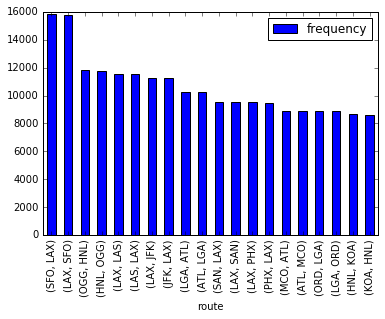

In [205]:
from matplotlib import cm
flight_airport_list_df[:20].plot(kind='bar',x='route')
#                                  ,y='frequency')
#                                  ,colormap=cm.get_cmap('Spectral'))

In [197]:
flight_airport_list_df.plot?


In [ ]:
flight_airport_list_df[:15].plot

In [ ]:
# by city

In [182]:
flights_city = list(zip(flight_data.ORIGIN_CITY_NAME, flight_data.DEST_CITY_NAME))
flights_city_count = Counter(flights_city)

In [183]:
flight_city_list = sorted(flights_city_count.items(), key=operator.itemgetter(1),reverse=True)
flight_city_list_df = pd.DataFrame.from_records(flight_city_list, columns=['route','frequency'])
flight_city_list_df[:15]

,route,frequency
0,"(San Francisco, CA, Los Angeles, CA)",15833
1,"(Los Angeles, CA, San Francisco, CA)",15798
2,"(Chicago, IL, New York, NY)",13304
3,"(New York, NY, Chicago, IL)",13253
4,"(Chicago, IL, Atlanta, GA)",13028
5,"(Atlanta, GA, Chicago, IL)",12998
6,"(New York, NY, Washington, DC)",12450
7,"(Washington, DC, New York, NY)",12413
8,"(New York, NY, Atlanta, GA)",12193
9,"(Atlanta, GA, New York, NY)",12191


In [256]:
list(flight_city_list_df.columns.values)

['route', 'frequency']

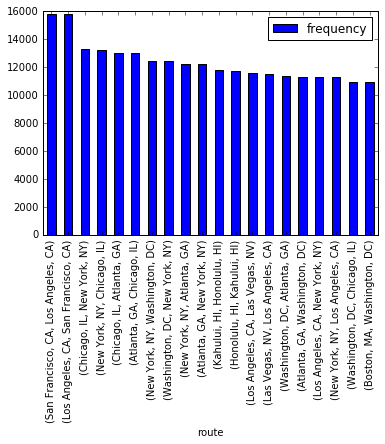

In [202]:
flight_city_list_df[:20].plot(kind='bar',x='route')

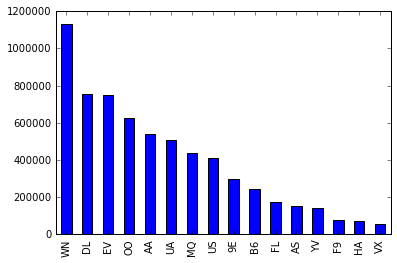

In [265]:
#2. What carrier has flown the 3rd most number of flights? How many? 
#outsourcing carrier

flight_data['CARRIER'].value_counts().plot(kind='bar')

In [70]:
flight_data['CARRIER'].value_counts()[0:3]

WN    1130704
DL     754670
EV     748696
Name: CARRIER, dtype: int64

In [137]:
flight_carrier = pd.DataFrame(flight_data['CARRIER'].value_counts().index,columns=['Carrier_code'])
flight_carrier

,Carrier_code
0,WN
1,DL
2,EV
3,OO
4,AA
5,UA
6,MQ
7,US
8,9E
9,B6


In [150]:
flight_carrier_frequency=pd.DataFrame(flight_data['CARRIER'].value_counts())

In [152]:
flight_carrier_frequency.index

Index([u'WN', u'DL', u'EV', u'OO', u'AA', u'UA', u'MQ', u'US', u'9E', u'B6',
       u'FL', u'AS', u'YV', u'F9', u'HA', u'VX'],
      dtype='object')

In [130]:
flight_data['CARRIER'].value_counts()

WN    1130704
DL     754670
EV     748696
OO     626359
AA     537891
UA     505798
MQ     439865
US     412373
9E     296701
B6     241777
FL     173952
AS     154743
YV     140922
F9      75612
HA      72286
VX      57133
Name: CARRIER, dtype: int64

In [132]:
carrier_look_up=pd.read_csv('code/L_UNIQUE_CARRIERS.csv')

In [134]:
carrier_look_up.columns

Index([u'Code', u'Description'], dtype='object')

In [153]:
flight_carrier_name = flight_carrier_frequency.merge(carrier_look_up,  right_on = 'Code',left_index='True',
                                                     how='left')

,CARRIER,Code,Description
1511,1130704,WN,Southwest Airlines Co.
516,754670,DL,Delta Air Lines Inc.
583,748696,EV,ExpressJet Airlines Inc.
1052,626359,OO,SkyWest Airlines Inc.
168,537891,AA,American Airlines Inc.
1416,505798,UA,United Air Lines Inc.
945,439865,MQ,Envoy Air
1427,412373,US,US Airways Inc.
152,296701,9E,Endeavor Air Inc.
334,241777,B6,JetBlue Airways


In [154]:
flight_carrier_name.columns

Index([u'CARRIER', u'Code', u'Description'], dtype='object')

In [166]:
flight_carrier_name.rename(columns={'CARRIER': 'frequency','Code':'Carrier_Code','Description':'Carrier'}, inplace=True)

In [32]:
# flight_carrier_name.plot(kind='pie', 
#                          x='Carrier',y='frequency')

In [33]:
# df.head

In [35]:
# df=pd.concat(flight_carrier_name['Carrier'], flight_carrier_name['frequency'], axis=1, keys=['Carrier', 'frequency'])
# df=flight_carrier_name.drop('Carrier_Code', 1)
# df=df[:9]
# # df

In [276]:
df=df.append(pd.DataFrame([[1213126,'Others']],columns=['frequency','Carrier']))

In [233]:
plt.pie?

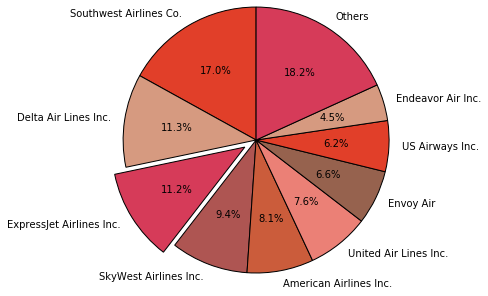

In [278]:
# Create a list of colors 
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    df['frequency'],
    labels=df['Carrier'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
     explode=(0, 0, 0.1, 0, 0,0, 0, 0,0,0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

In [ ]:
labels = ['Cookies', 'Jellybean', 'Milkshake', 'Cheesecake']
sizes = [38.4, 40.6, 20.7, 10.3]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [33]:
# 3. What airport has the 10th longest delays? -- departure? arrival?

# aviation flying time, reason for delay
# take off late, arrive late,
# delay time period
# what time is the least busy time to fly
# fly directly vs. reroute, which travel time is shorter

In [4]:
#departure
flight_data_dropna=flight_data.copy(deep=True)
flight_data_dropna['DEP_DELAY'].replace('', np.nan, inplace=True)
flight_data_dropna.dropna(subset=['DEP_DELAY'], inplace=True)

In [5]:
delay_origin = pd.DataFrame(flight_data_dropna.sort_values(by='DEP_DELAY', ascending=False)) 

In [62]:
# delay_origin.head

In [7]:
departure_flights = flight_data_dropna['ORIGIN'].value_counts()

In [8]:
delay_origin_sorted = delay_origin.groupby(['ORIGIN'])['DEP_DELAY'].sum().sort_values(ascending=False)
# delay_origin_sorted[:10] # .plot(kind='bar')

In [ ]:
delay_origin_per_flight = (delay_origin_sorted/departure_flights).sort_values(ascending=False)

In [31]:
delay_origin_per_flight

CYS    60.000000
PPG    55.764151
OTH    32.260949
CEC    24.764835
ACV    18.571851
MVY    18.186603
SUX    16.347626
MDW    16.256888
ORD    16.061840
RDD    15.900716
CIC    15.657363
SHD    15.380952
EWR    15.107954
COU    15.000990
MFR    14.981254
ART    14.959933
MOD    14.761858
ALO    14.379471
DEN    13.910384
TTN    13.660052
HOU    13.295712
SGF    13.237877
MMH    13.180685
IAD    13.113340
GGG    12.978134
SAF    12.918167
CMX    12.905556
BWI    12.870369
CMI    12.857790
CAE    12.794838
         ...    
YUM     0.461667
GFK     0.446226
IDA     0.405233
LMT     0.400289
PIH     0.354839
WRG     0.283708
AZA     0.121951
MCN     0.000000
SCE    -0.052745
ESC    -0.053333
HLN    -0.141516
FCA    -0.278286
IPL    -0.291480
ITO    -0.305144
TWF    -0.585608
BRD    -0.588764
FAI    -0.743105
BTM    -0.906207
ADQ    -1.354267
FLG    -2.056869
BET    -2.398119
LWS    -3.341463
IYK    -3.507722
ADK    -3.928571
WYS    -4.302583
AKN    -4.558442
CDV    -4.919831
HIB    -5.8686

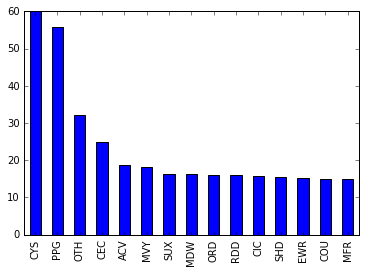

In [16]:
delay_origin_per_flight[:15].plot(kind='bar')

In [19]:
#arrival
flight_data_dropna1=flight_data.copy(deep=True)
flight_data_dropna1['ARR_DELAY'].replace('', np.nan, inplace=True)
flight_data_dropna1.dropna(subset=['ARR_DELAY'], inplace=True)

In [20]:
delay_dest = pd.DataFrame(flight_data_dropna1.sort_values(by='ARR_DELAY', ascending=False)) 
delay_dest.columns

Index([u'YEAR', u'MONTH', u'DAY_OF_MONTH', u'FL_DATE', u'AIRLINE_ID',
       u'CARRIER', u'ORIGIN_AIRPORT_ID', u'ORIGIN', u'ORIGIN_CITY_NAME',
       u'ORIGIN_STATE_ABR', u'DEST_AIRPORT_ID', u'DEST', u'DEST_CITY_NAME',
       u'DEST_STATE_ABR', u'DEP_TIME', u'DEP_DELAY', u'DEP_DELAY_NEW',
       u'ARR_TIME', u'ARR_DELAY', u'ARR_DELAY_NEW', u'CANCELLED', u'AIR_TIME',
       u'FLIGHTS', u'DISTANCE', u'Unnamed: 24'],
      dtype='object')

In [21]:
delay_dest_sorted = delay_dest.groupby(['DEST'])['ARR_DELAY'].sum().sort_values(ascending=False)
# delay_dest_sorted[:10]

In [23]:
arrival_flights = flight_data_dropna['DEST'].value_counts()
# arrival_flights

In [24]:
delay_dest_per_flight = (delay_dest_sorted/arrival_flights).sort_values(ascending=False)

In [25]:
delay_dest_per_flight

PPG    23.669811
ALO    20.586687
TTN    20.024159
OTH    19.742754
CMI    18.725270
SUX    17.824695
ART    16.804312
RFD    16.698795
GUM    15.798343
CEC    15.204104
RDD    14.901610
CMX    14.604620
CIC    14.459826
COU    14.213018
TYS    13.864373
MQT    13.857143
GUC    13.081967
LNK    13.008797
HOB    12.796902
GRI    12.781487
CAE    12.640523
PSE    12.448276
SGF    12.415014
ISP    12.371266
ASE    12.343488
BRO    12.236020
AVP    12.153472
FSD    12.107029
ORH    12.078431
COS    12.030454
         ...    
ADQ     0.496088
SCE     0.456197
YUM     0.305675
RHI     0.253202
LCH     0.168047
BJI     0.100413
IYK    -0.066540
MVY    -0.281690
PIH    -0.373306
DBQ    -0.530120
APN    -0.575121
BRD    -1.124861
SHD    -1.166667
IPL    -1.566964
HIB    -1.601942
FLG    -2.157159
YAK    -2.551821
EKO    -2.665399
DRT    -2.674286
AKN    -2.766234
SMX    -2.985401
SPN    -3.000000
WYS    -3.610294
LAR    -4.514245
BTM    -4.856563
BLI    -6.032258
ADK    -6.110000
INL    -6.5154

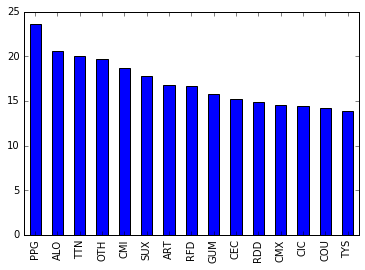

In [27]:
delay_dest_per_flight[:15].plot(kind='bar')

In [30]:
(delay_dest_per_flight+delay_origin_per_flight).sort_values(ascending=False)

PPG    79.433962
OTH    52.003703
CEC    39.968939
ALO    34.966159
SUX    34.172321
TTN    33.684211
ART    31.764245
CMI    31.583060
RDD    30.802326
CIC    30.117189
ACV    29.577963
COU    29.214008
CMX    27.510175
GUM    26.611015
EWR    26.197442
ORD    25.785559
SGF    25.652891
GUC    25.630824
CAE    25.435361
TYS    24.107138
MOD    23.728128
LNK    23.433899
ASE    23.116707
XNA    22.993561
MDW    22.892430
SAF    22.486559
CWA    22.382927
ISP    22.229687
COS    22.030562
SFO    21.915725
         ...    
LAR     1.145697
TWF     0.822199
YUM     0.767342
BET     0.501154
FCA     0.427850
SCE     0.403452
FAI     0.151128
PIH    -0.018467
ADQ    -0.858180
SMX    -1.389969
BRD    -1.713625
IPL    -1.858444
EKO    -1.885285
DRT    -1.897143
IMT    -3.082655
IYK    -3.574262
BLI    -3.688543
CDV    -3.917018
FLG    -4.214028
INL    -5.381994
BTM    -5.762770
AKN    -7.324675
HIB    -7.470579
WYS    -7.912877
YAK    -8.825832
LWS   -10.009645
ADK   -10.038571
SPN   -12.0000

In [42]:
# df2 = pd.DataFrame({'X' : ['B', 'B', 'A', 'A'], 'Y' : [1, 2, 3, 4]})
# df2.groupby(['X']).groups
# delay_dest_df=pd.DataFrame(delay_dest, columns=['DEST','dest_delay'])
# delay_dest_df.dest_delay
# delay_dest_df.groupby(['DEST']).groups
# .sum()

In [295]:
# national mean delay for arrival
flight_data_dropna['ARR_DELAY'].mean()
# delay_dest_sorted.columns

6.010871805358738

In [296]:
# national mean delay for departure
flight_data_dropna1['DEP_DELAY'].mean()

9.684818773954317

In [ ]:
# 4. What is the second most popular day of the week to travel? Why? 
# by clock hours, departing time

In [81]:
weekdays = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [83]:
import datetime
weekdays.get(datetime.date(flight_data['YEAR'][:1],flight_data['MONTH'][:1],flight_data['DAY_OF_MONTH'][:1]).weekday())

'Thursday'

In [67]:
flight_data_day = flight_data.copy('deep')

In [85]:
def weekday (row):
    return weekdays.get(datetime.date(row['YEAR'],row['MONTH'],row['DAY_OF_MONTH']).weekday())

In [90]:
flight_data_day = flight_data_day.assign(DAY_OF_WEEK=flight_data_day.apply(lambda row: weekday(row),axis=1))

In [89]:
# flight_data_day.drop('Unnamed: 24',1)

,YEAR,MONTH,DAY_OF_MONTH,FL_DATE,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,...,DEP_DELAY,DEP_DELAY_NEW,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CANCELLED,AIR_TIME,FLIGHTS,DISTANCE,DAY_OF_WEEK
0,2013,1,17,2013-01-17,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,-7.0,0.0,1451.0,-14.0,0.0,0.0,175.0,1.0,1391.0,Thursday
1,2013,1,18,2013-01-18,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,-8.0,0.0,1459.0,-6.0,0.0,0.0,178.0,1.0,1391.0,Friday
2,2013,1,19,2013-01-19,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,-5.0,0.0,1515.0,17.0,17.0,0.0,201.0,1.0,1391.0,Saturday
3,2013,1,20,2013-01-20,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,-8.0,0.0,1455.0,-10.0,0.0,0.0,176.0,1.0,1391.0,Sunday
4,2013,1,21,2013-01-21,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,-1.0,0.0,1446.0,-19.0,0.0,0.0,162.0,1.0,1391.0,Monday
5,2013,1,22,2013-01-22,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,9.0,9.0,1502.0,-3.0,0.0,0.0,171.0,1.0,1391.0,Tuesday
6,2013,1,23,2013-01-23,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,-9.0,0.0,1504.0,-1.0,0.0,0.0,186.0,1.0,1391.0,Wednesday
7,2013,1,24,2013-01-24,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,-9.0,0.0,1520.0,15.0,15.0,0.0,204.0,1.0,1391.0,Thursday
8,2013,1,25,2013-01-25,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,-3.0,0.0,1525.0,20.0,20.0,0.0,174.0,1.0,1391.0,Friday
9,2013,1,26,2013-01-26,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,-6.0,0.0,1509.0,11.0,11.0,0.0,189.0,1.0,1391.0,Saturday


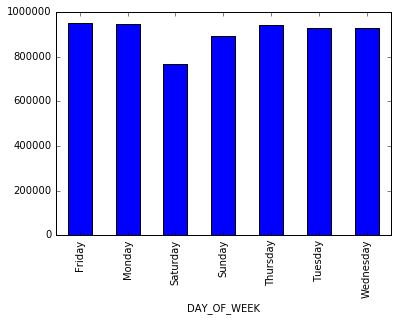

In [100]:
# df_plot=flight_data_day.groupby('DAY_OF_WEEK').count()
df_plot['FL_DATE'].plot(kind='bar')

In [37]:
# flight_data_day.groupby('DAY_OF_WEEK').count()